In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
testSites = pd.read_csv('./data_sets/NC_testSites.csv')
byRace = pd.read_csv('./data_sets/NC_counties_byRace.csv')
byHisp = pd.read_csv('./data_sets/NC_counties_byHisp.csv')
testSites.columns

/Users/jincho/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'name', 'fulladdr', 'municipality', 'agency',
       'agencytype', 'phone', 'agencyurl', 'operhours', 'Instructions',
       'status', 'drive_through', 'appt_only', 'referral_required',
       'services_offered_onsite', 'call_first', 'virtual_screening',
       'health_dept_url', 'State', 'county', 'type_of_test', 'facility_type'],
      dtype='object')

In [15]:
testSites_cond = testSites.drop(columns=['municipality','Unnamed: 0', 'name', 'agency', 'phone', 'agencyurl', 'Instructions', 'drive_through', 'appt_only', 'call_first', 'health_dept_url', 'State'])

In [16]:
testSites_cond.head()

,fulladdr,agencytype,operhours,status,referral_required,services_offered_onsite,virtual_screening,county,type_of_test,facility_type
0,"111 Gateway Center Drive, Kernersville, NC 27284",Non Profit,8am - 5pm M-F,Open,Yes,screening and testing,Available,Forsyth,molecular,Clinic
1,"600 Highland Oaks Drive, Winston-Salem, NC 27103",Non Profit,8am - 5pm M-F,Open,Yes,screening and testing,NaN,Forsyth,molecular,Clinic
2,"1814 Westchester Dr., Suite 202, High Point",Non Profit,"8am - 5pm M-F by appointment only, 1pm - 5pm S...",Open,Yes,NaN,NaN,Guilford,molecular,Clinic
3,"1713 South Church Street, Burlington, NC 27215",Private,Monday: 8:00AM - 8:00PM Tuesday: 8:00AM - ...,Open,No,screening and testing,Available,Alamance,molecular and antibody,Urgent Care
4,"903 Randolph St, Thomasville, NC 27360",Regional,"Monday to Friday, 8 a.m. to 5 p.m",Open,Yes,screening and testing,Available,Davidson,molecular,Non-medical Facility


In [60]:
testSites_cond = testSites_cond[(testSites_cond.status!='Closed') & (testSites_cond.status!='Temporarily Closed')]

In [78]:
print(byHisp[byHisp['CTYNAME']=='Forsyth'].TOT_POP.iloc[0])

354524


In [41]:
byHisp.head()

,Unnamed: 0,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,...,TOT_NHIA,TOT_NHAA,TOT_NHNA,TOT_NHTOM,TOT_HWA,TOT_HBA,TOT_HIA,TOT_HAA,TOT_HNA,TOT_HTOM
0,57,North Carolina,Alamance,152692,72642,80050,48605,53836,13041,15351,...,564,1931,60,2203,13995,855,1547,82,41,581
1,285,North Carolina,Alexander,37026,18827,18199,16296,16243,1208,751,...,91,359,13,428,1486,57,60,4,1,29
2,513,North Carolina,Allegha,11016,5449,5567,4681,5048,66,69,...,18,55,3,86,889,30,34,10,1,26
3,741,North Carolina,Ans,26512,13829,12683,6173,5889,6713,6194,...,154,290,4,284,632,61,50,14,12,42
4,969,North Carolina,Ashe,26986,13303,13683,12191,12972,81,74,...,50,113,5,230,1162,47,22,2,7,30


In [105]:
comb_test_hisp = pd.DataFrame(columns = ['county', 'testSites', 'totPop', \
                                         'totNHWA', 'totNHBA', 'totNHIA', 'totNHAA', 'totNHNA', 'totNHTOM',\
                                         'totHWA', 'totHBA', 'totHIA', 'totHAA', 'totHNA', 'totHTOM'])
comb_test_hisp.head()

,county,testSites,totPop,totNHWA,totNHBA,totNHIA,totNHAA,totNHNA,totNHTOM,totHWA,totHBA,totHIA,totHAA,totHNA,totHTOM


In [106]:
for county in testSites_cond.county.unique():
    if(county in byHisp.CTYNAME.unique()):
        num_testSites = len(testSites_cond[testSites_cond.county==county])
        totPop = byHisp[byHisp['CTYNAME']==county].TOT_POP.iloc[0]
        totNHWA = byHisp[byHisp['CTYNAME']==county].TOT_NHWA.iloc[0]
        totNHBA = byHisp[byHisp['CTYNAME']==county].TOT_NHBA.iloc[0]
        totNHIA = byHisp[byHisp['CTYNAME']==county].TOT_NHIA.iloc[0]
        totNHAA = byHisp[byHisp['CTYNAME']==county].TOT_NHAA.iloc[0]
        totNHNA = byHisp[byHisp['CTYNAME']==county].TOT_NHNA.iloc[0]
        totNHTOM = byHisp[byHisp['CTYNAME']==county].TOT_NHTOM.iloc[0]
        totHWA = byHisp[byHisp['CTYNAME']==county].TOT_HWA.iloc[0]
        totHBA = byHisp[byHisp['CTYNAME']==county].TOT_HBA.iloc[0]
        totHIA = byHisp[byHisp['CTYNAME']==county].TOT_HIA.iloc[0]
        totHAA = byHisp[byHisp['CTYNAME']==county].TOT_HAA.iloc[0]
        totHNA = byHisp[byHisp['CTYNAME']==county].TOT_HNA.iloc[0]
        totHTOM = byHisp[byHisp['CTYNAME']==county].TOT_HTOM.iloc[0]
        comb_test_hisp = comb_test_hisp.append({'county':county, 'testSites':num_testSites, 'totPop':totPop, 'totNHWA':totNHWA, \
                           'totNHBA':totNHBA, 'totNHIA':totNHIA, 'totNHAA':totNHAA, 'totNHNA':totNHNA, \
                           'totNHTOM':totNHTOM, 'totHWA':totHWA, 'totHBA':totHWA, 'totHIA':totHIA,\
                           'totHAA':totHAA, 'totHNA':totHNA, 'totHTOM':totHTOM}, ignore_index=True)
    
    
    

In [107]:
comb_test_hisp.head()

,county,testSites,totPop,totNHWA,totNHBA,totNHIA,totNHAA,totNHNA,totNHTOM,totHWA,totHBA,totHIA,totHAA,totHNA,totHTOM
0,Forsyth,20,354524,207890,90814,937,6934,186,5271,33070,33070,1962,275,200,1533
1,Guilford,22,494953,266735,161153,2122,20330,229,8757,28598,28598,1393,352,137,1319
2,Alamance,5,152692,102441,28392,564,1931,60,2203,13995,13995,1547,82,41,581
3,Wake,48,928787,576108,189845,2642,52166,319,16969,73297,73297,5070,707,279,3487
4,Moore,5,89262,69328,11775,690,821,28,1265,4700,4700,115,45,115,172


In [109]:
comb_test_hisp = comb_test_hisp.set_index('county')

In [129]:
comb_test_hisp['totNH'] = comb_test_hisp['totNHWA']+comb_test_hisp['totNHBA']+comb_test_hisp['totNHIA']+comb_test_hisp['totNHAA']+\
                        comb_test_hisp['totNHNA']+comb_test_hisp['totNHTOM']


In [130]:
comb_test_hisp['totH'] = comb_test_hisp['totHWA']+comb_test_hisp['totHBA']+comb_test_hisp['totHIA']+comb_test_hisp['totHAA']+\
                        comb_test_hisp['totHNA']+comb_test_hisp['totHTOM']


In [131]:
comb_test_hisp['H_perc'] = comb_test_hisp['totH'] / comb_test_hisp['totPop']
comb_test_hisp['NH_perc'] = comb_test_hisp['totNH'] / comb_test_hisp['totPop']

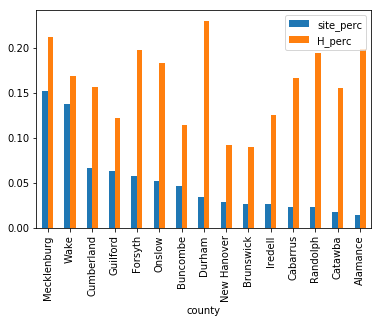

In [145]:
comb_test_hisp[['site_perc', 'H_perc']].sort_values(by='site_perc', ascending=False).head(15).plot.bar()

In [167]:
comb_test_hisp['totPop_class'] = np.round(np.array(comb_test_hisp['totPop']).astype(np.double),-3)

In [177]:
comb_test_hisp['totPop_class'].sort_values().unique()

,Unnamed: 0,TOT_POP,TOT_MALE,TOT_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,...,TOT_NHIA,TOT_NHAA,TOT_NHNA,TOT_NHTOM,TOT_HWA,TOT_HBA,TOT_HIA,TOT_HAA,TOT_HNA,TOT_HTOM
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,11343.000000,96575.920000,47063.190000,49512.730000,30699.420000,32149.450000,9625.160000,10945.750000,536.97000,570.97000,...,1107.940000,2215.090000,56.820000,1564.370000,6783.860000,640.900000,389.080000,72.460000,50.150000,275.470000
std,6614.620171,145531.356886,70367.957404,75196.175019,41017.251941,43009.886841,18394.788783,21940.399906,2485.93729,2696.03286,...,5181.837903,7274.091313,137.744485,2763.300792,13044.800935,1561.352803,735.277941,137.942487,86.072482,582.389409
min,57.000000,4337.000000,2393.000000,1944.000000,1207.000000,1103.000000,11.000000,6.000000,3.00000,3.00000,...,6.000000,18.000000,0.000000,56.000000,138.000000,0.000000,1.000000,0.000000,0.000000,3.000000
25%,5700.000000,24585.000000,12138.500000,12640.250000,8476.500000,9013.000000,1201.500000,1138.250000,49.25000,43.75000,...,102.000000,109.250000,5.000000,283.250000,729.000000,55.500000,50.000000,7.000000,4.000000,29.000000
50%,11343.000000,55082.000000,26282.000000,28116.000000,16878.500000,17656.500000,5378.500000,5920.000000,112.00000,104.50000,...,220.000000,311.500000,14.000000,691.500000,2339.000000,163.000000,175.000000,26.500000,24.500000,86.500000
75%,16986.000000,108073.750000,52745.500000,55751.250000,35966.500000,37480.750000,9583.500000,10936.000000,327.25000,333.25000,...,656.750000,1064.250000,45.250000,1654.750000,8878.000000,475.750000,423.000000,81.000000,50.500000,257.500000
max,22629.000000,943823.000000,455318.000000,488505.000000,282376.000000,293732.000000,131414.000000,157779.000000,24722.00000,26796.00000,...,51518.000000,52166.000000,1135.000000,16969.000000,95226.000000,10725.000000,5070.000000,951.000000,568.000000,3487.000000


In [180]:
bins = [0, 15000, 30000, 45000, 60000, 100000, 200000, 500000, np.inf]
labels = ['<15000', '15000-30000', '30000-45000', '45000-60000', '60000-100000', '100000-200000', '200000-500000', '500000+']

comb_test_hisp['totPop_class'] = pd.cut(comb_test_hisp['totPop'], bins, labels=labels)

comb_test_hisp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Forsyth to Tyrrell
Data columns (total 20 columns):
testSites       55 non-null object
totPop          55 non-null object
totNHWA         55 non-null object
totNHBA         55 non-null object
totNHIA         55 non-null object
totNHAA         55 non-null object
totNHNA         55 non-null object
totNHTOM        55 non-null object
totHWA          55 non-null object
totHBA          55 non-null object
totHIA          55 non-null object
totHAA          55 non-null object
totHNA          55 non-null object
totHTOM         55 non-null object
totH            55 non-null object
totNH           55 non-null object
H_perc          55 non-null object
NH_perc         55 non-null object
site_perc       55 non-null object
totPop_class    55 non-null category
dtypes: category(1), object(19)
memory usage: 11.5+ KB


In [191]:
comb_test_hisp[comb_test_hisp.totPop_class=='200000-500000']\
.sort_values(by='totPop', ascending=False)[['site_perc', 'H_perc']].plot.bar()

TypeError: Empty 'DataFrame': no numeric data to plot

In [200]:
testSites_cond.county.sort_values().unique()

array(['Alamance', 'Alexander', 'Alleghany', 'Ashe', 'Beaufort', 'Bertie',
       'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell',
       'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee',
       'Chowan', 'Cleveland', 'Columbus', 'Craven', 'Cumberland',
       'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham',
       'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham',
       'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson',
       'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee',
       'Lenoir', 'Lincoln', 'Macon', 'Madison', 'Martin', 'Mecklenberg',
       'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash',
       'New Hanover', 'Onslow', 'Orange', 'Pasquotank', 'Pender',
       'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond',
       'Robeson', 'Rockingham', 'Rowan', 'Sampson', 'Stanly', 'Surry',
       'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', 'Wake',
      